<a href="https://colab.research.google.com/github/CodeGeek2003/Selected-Topics-IS-Phase1/blob/Abdo/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report


In [62]:
df = pd.read_csv('customer_data.csv')
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [63]:
df=df.drop(columns='loyalty_status')
X = df.drop('id', axis=1)
df.drop_duplicates(inplace=True)

In [64]:
df.head(5)

,id,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,occasional,19685,Clothing,1,5


In [69]:
print(df.info())
print("--------------------------------")
print(df.describe())
print("--------------------------------")
print("Nulls = ",df.isnull().sum())
print("--------------------------------")
print("Number of duplicates = ",df.duplicated().sum())
print("--------------------------------")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
 11  Cluster             100000 non-null  int32 
dtypes: int32(1), int64(6), object(5)
memory usage: 8.8+ MB
None
--------------------------------
                  id            age         income  purchase_amount  \
count  100000.000000  100000.000000

In [65]:
#Label Encoding four categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['education'] = le.fit_transform(X['education'])
X['region'] = le.fit_transform(X['region'])
X['gender'] = le.fit_transform(X['gender'])
X['product_category'] = le.fit_transform(X['product_category'])
X['purchase_frequency'] = le.fit_transform(X['purchase_frequency'])
X.head()

,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,27,1,40682,0,0,0,18249,1,0,6
1,29,1,15317,3,3,2,4557,2,1,6
2,37,1,38849,0,3,2,11822,2,0,6
3,30,1,11568,2,2,0,4098,4,0,7
4,31,0,46952,1,1,1,19685,2,1,5


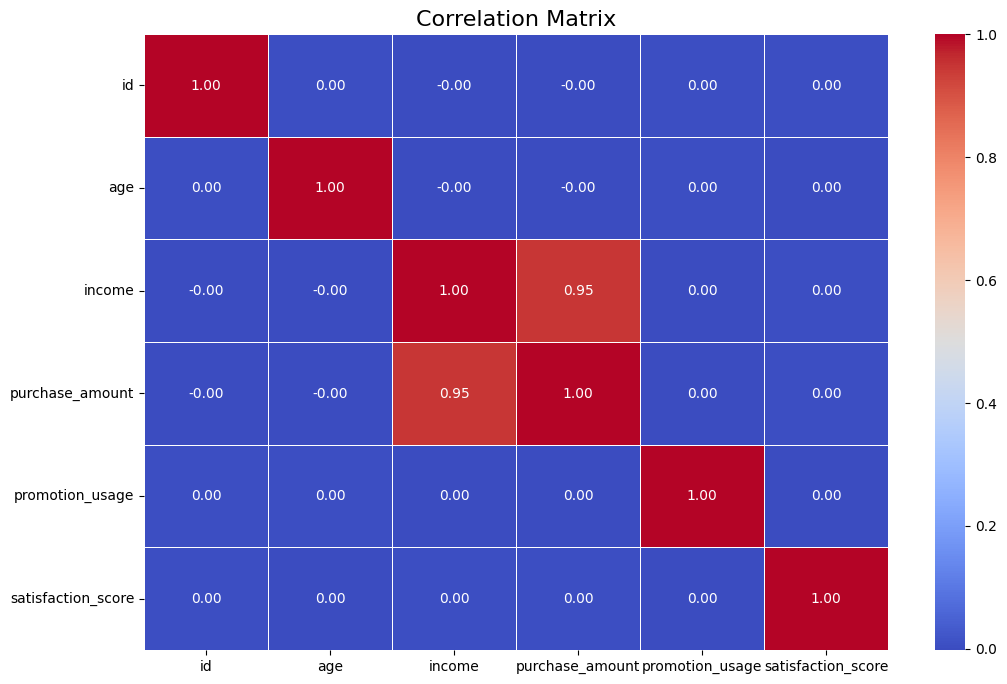

In [66]:
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix with values
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_
print(df[['id', 'Cluster']])


           id  Cluster
0           1        2
1           2        0
2           3        2
3           4        0
4           5        2
...       ...      ...
99995   99996        1
99996   99997        0
99997   99998        0
99998   99999        2
99999  100000        1

[100000 rows x 2 columns]
